In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Предобработка (часть 1)

In [94]:
df = pd.read_csv('data/laptop_info.csv')

In [95]:
df.columns

Index(['№', 'Модель (полное название)', 'Модель процессора',
       'Год выпуска процессора', 'Количество ядер',
       'Количество логических процессоров (потоков)',
       'Тактовая частота процессора (ГГц)',
       'Максимальная тактовая частота (ГГц)', 'Объем кэша L2 процессора (Кб)',
       'Объем кэша L3 процессора (Кб)', 'Размер оперативной памяти (Гб)',
       'Частота оперативной памяти (МГц)', 'HDD', 'SSD',
       'Вид графического ускорителя (Дискретный / Встроенный)',
       'Тип видеопамяти', 'Модель дискретной видеокарты',
       'Объем видеопамяти (Гб)', 'Модель встроенной видеокарты',
       'Объем видеопамяти (Гб).1', 'Тип (марка) куллера материнской платы',
       'Браузер для тестов', 'Учебный', 'Развлекательный', 'Эталон',
       'Исполнитель'],
      dtype='object')

In [96]:
useles_columns = ['№', 'Модель (полное название)', 'Модель процессора', 'Год выпуска процессора', 'Модель встроенной видеокарты', 'Тип (марка) куллера материнской платы', 'Браузер для тестов','Исполнитель', 'Модель дискретной видеокарты']
df = df.drop(labels = useles_columns,axis = 1)
new_names = {'Объем видеопамяти (Гб)': 'Объем видеопамяти (Гб) [дискретной]',
                    'Объем видеопамяти (Гб).1': 'Объем видеопамяти (Гб) [встроенной]'}  
df = df.rename(columns=new_names)

In [97]:
df[df.isnull().any(1)]

,Количество ядер,Количество логических процессоров (потоков),Тактовая частота процессора (ГГц),Максимальная тактовая частота (ГГц),Объем кэша L2 процессора (Кб),Объем кэша L3 процессора (Кб),Размер оперативной памяти (Гб),Частота оперативной памяти (МГц),HDD,SSD,Вид графического ускорителя (Дискретный / Встроенный),Тип видеопамяти,Объем видеопамяти (Гб) [дискретной],Объем видеопамяти (Гб) [встроенной],Учебный,Развлекательный,Эталон
0,6,12,3.0,4.0,3072,8192,8,3200,0,512,дискретный и встроенный,GDDR6,4.0,0.5,NaN,NaN,NaN
1,2,4,2.2,3.4,512,4096,4,2133,0,128,встроенный,SMA,NaN,0.128,2523.0,2299.0,2743.0
3,6,12,2.3,4.2,3072,16384,16,3200,0,512,встроенный,DDR4,NaN,8,NaN,NaN,NaN
4,4,4,1.1,3.3,1536,4096,8,3200,0,256,встроенный,DDR4,NaN,8,NaN,NaN,NaN
6,8,16,2.1,3.1,2048,16384,16,2064,0,512,дискретный и встроенный,LPDDR4X,NaN,8,5083.0,5101.0,5034.0
7,2,2,1.2,3.6,1024,4096,8,2667,0,250,встроенный,DDR4,NaN,1,NaN,NaN,NaN
8,6,12,2.6,8.4,1536,12288,16,2600,0,954,дискретный и встроенный,DDR4,4.0,2,NaN,NaN,NaN
9,4,8,2.1,3.7,2048,4096,8,2400,0,256,встроенный,DDR4,NaN,1,3670.0,3719.0,3861.0
11,4,4,2.1,2.3,512,4096,8,2400,0,256,встроенный,DDR4,NaN,4,3028.0,3253.0,3258.0
12,4,8,1.6,1.8,1024,6144,8,2400,0,256,встроенный,DDR4,NaN,4,3460.0,3652.0,3757.0


In [98]:
num_features = ['Количество ядер', 'Количество логических процессоров (потоков)', 'Тактовая частота процессора (ГГц)','HDD','SSD' , 'Объем видеопамяти (Гб) [встроенной]', 'Объем видеопамяти (Гб) [дискретной]']
cat_features = ['Вид графического ускорителя (Дискретный / Встроенный)', 'Тип видеопамяти', 'Размер оперативной памяти (Гб)']

In [99]:
df.columns

Index(['Количество ядер', 'Количество логических процессоров (потоков)',
       'Тактовая частота процессора (ГГц)',
       'Максимальная тактовая частота (ГГц)', 'Объем кэша L2 процессора (Кб)',
       'Объем кэша L3 процессора (Кб)', 'Размер оперативной памяти (Гб)',
       'Частота оперативной памяти (МГц)', 'HDD', 'SSD',
       'Вид графического ускорителя (Дискретный / Встроенный)',
       'Тип видеопамяти', 'Объем видеопамяти (Гб) [дискретной]',
       'Объем видеопамяти (Гб) [встроенной]', 'Учебный', 'Развлекательный',
       'Эталон'],
      dtype='object')

In [100]:
obj_df = df[num_features].copy()
obj_df['Объем видеопамяти (Гб) [дискретной]'] = pd.to_numeric(obj_df['Объем видеопамяти (Гб) [дискретной]'], errors='coerce')
obj_df['Объем видеопамяти (Гб) [встроенной]'] = pd.to_numeric(obj_df['Объем видеопамяти (Гб) [встроенной]'], errors='coerce')
obj_df = obj_df.fillna({"Объем видеопамяти (Гб) [встроенной]": 0,
                       "Объем видеопамяти (Гб) [дискретной]": 0})

In [101]:
df[num_features] = obj_df

In [102]:
def rename_cols(old_name, one_hot):
    new_cols = {}
    for column in one_hot:
        new_cols[column] = old_name + ": " + column
    return one_hot.rename(columns=new_cols)

In [103]:
graph_acc = pd.get_dummies(df['Вид графического ускорителя (Дискретный / Встроенный)'])
graph_acc.columns = graph_acc.columns.str.strip()
graph_acc.loc[graph_acc['дискретный и встроенный'] == 1, ['встроенный', 'дискретный']] = 1
graph_acc = graph_acc.drop('дискретный и встроенный', axis=1)
graph_acc = rename_cols('Вид графического ускорителя', graph_acc)
    

In [104]:
video_mem = pd.get_dummies(df['Тип видеопамяти'])
video_mem = rename_cols('Тип видеопамяти', video_mem)

In [105]:
RAM_size = (df['Размер оперативной памяти (Гб)'] // 8 > 0).astype(int)

In [106]:
def add_cols(df, add_df):
    for column in add_df.columns:
        df[column] = add_df[column]

In [107]:
df = df.drop(cat_features, axis=1)
add_cols(df, graph_acc)
add_cols(df, video_mem)
df['Оперативная память > 8'] = RAM_size

In [108]:
benchmark_columns = ['Учебный', 'Развлекательный', 'Эталон']
benchmark_df = df[benchmark_columns].copy()
benchmark_df = benchmark_df.dropna()
benchmark_df['sum'] = benchmark_df[benchmark_columns].sum(axis=1)
df = df.drop(['Учебный', 'Развлекательный', 'Эталон'], axis=1)

In [109]:
df['benchmark'] = benchmark_df['sum']

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 22 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Количество ядер                              23 non-null     int64  
 1   Количество логических процессоров (потоков)  23 non-null     int64  
 2   Тактовая частота процессора (ГГц)            23 non-null     float64
 3   Максимальная тактовая частота (ГГц)          23 non-null     float64
 4   Объем кэша L2 процессора (Кб)                23 non-null     int64  
 5   Объем кэша L3 процессора (Кб)                23 non-null     int64  
 6   Частота оперативной памяти (МГц)             23 non-null     int64  
 7   HDD                                          23 non-null     int64  
 8   SSD                                          23 non-null     int64  
 9   Объем видеопамяти (Гб) [дискретной]          23 non-null     float64
 10  Объе

In [21]:
# --- Linear Regression --- 

In [112]:
df.head()

,Количество ядер,Количество логических процессоров (потоков),Тактовая частота процессора (ГГц),Максимальная тактовая частота (ГГц),Объем кэша L2 процессора (Кб),Объем кэша L3 процессора (Кб),Частота оперативной памяти (МГц),HDD,SSD,Объем видеопамяти (Гб) [дискретной],...,Вид графического ускорителя: дискретный,Тип видеопамяти: DDR3,Тип видеопамяти: DDR4,Тип видеопамяти: GDDR3,Тип видеопамяти: GDDR5,Тип видеопамяти: GDDR6,Тип видеопамяти: LPDDR4X,Тип видеопамяти: SMA,Оперативная память > 8,benchmark
0,6,12,3.0,4.0,3072,8192,3200,0,512,4.0,...,1,0,0,0,0,1,0,0,1,NaN
1,2,4,2.2,3.4,512,4096,2133,0,128,0.0,...,0,0,0,0,0,0,0,1,0,7565.0
2,2,4,2.4,2.4,256,3072,1600,232,0,2.0,...,1,1,0,0,0,0,0,0,0,13360.0
3,6,12,2.3,4.2,3072,16384,3200,0,512,0.0,...,0,0,1,0,0,0,0,0,1,NaN
4,4,4,1.1,3.3,1536,4096,3200,0,256,0.0,...,0,0,1,0,0,0,0,0,1,NaN


In [113]:
df.describe()

,Количество ядер,Количество логических процессоров (потоков),Тактовая частота процессора (ГГц),Максимальная тактовая частота (ГГц),Объем кэша L2 процессора (Кб),Объем кэша L3 процессора (Кб),Частота оперативной памяти (МГц),HDD,SSD,Объем видеопамяти (Гб) [дискретной],...,Вид графического ускорителя: дискретный,Тип видеопамяти: DDR3,Тип видеопамяти: DDR4,Тип видеопамяти: GDDR3,Тип видеопамяти: GDDR5,Тип видеопамяти: GDDR6,Тип видеопамяти: LPDDR4X,Тип видеопамяти: SMA,Оперативная память > 8,benchmark
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,16.000000
mean,3.739130,6.956522,2.043478,3.321739,1224.347826,6144.000000,2440.347826,184.000000,320.826087,1.478261,...,0.478261,0.043478,0.521739,0.043478,0.217391,0.043478,0.043478,0.086957,0.782609,9714.875000
std,1.737746,3.807627,0.529859,1.377401,838.309913,4176.660345,589.856578,465.888008,217.405497,2.107768,...,0.510754,0.208514,0.510754,0.208514,0.421741,0.208514,0.208514,0.288104,0.421741,2839.959903
min,2.000000,2.000000,1.000000,1.200000,256.000000,0.000000,1333.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3873.000000
25%,2.000000,4.000000,1.650000,2.450000,512.000000,3584.000000,2133.000000,0.000000,239.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7662.500000
50%,4.000000,8.000000,2.200000,3.300000,1024.000000,4096.000000,2400.000000,0.000000,256.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9891.500000
75%,4.000000,8.000000,2.400000,3.850000,1792.000000,8192.000000,2667.000000,0.000000,512.000000,2.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11302.750000
max,8.000000,16.000000,3.000000,8.400000,3072.000000,16384.000000,3733.000000,2000.000000,954.000000,8.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15218.000000


In [114]:
df.shape

(23, 22)

## Предобработка (часть 2)

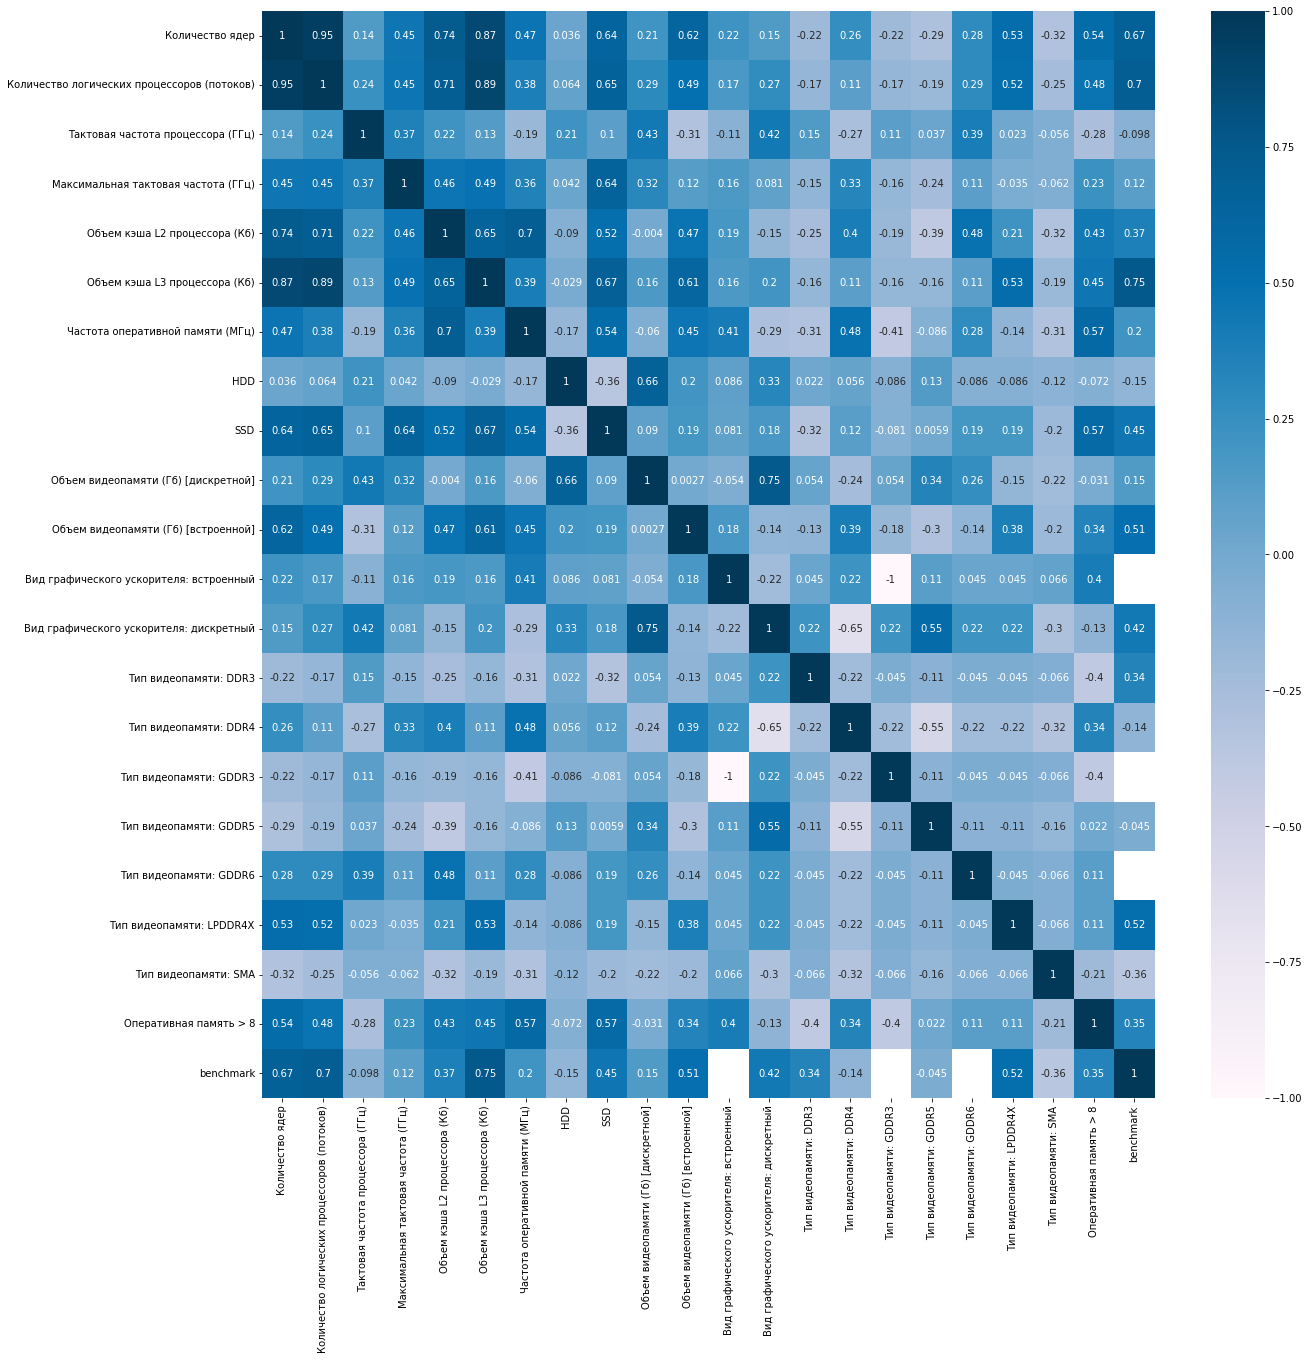

In [91]:
plt.figure(figsize=(20,20))  
p=sns.heatmap(df.corr(), annot=True,cmap =plt.cm.PuBu)

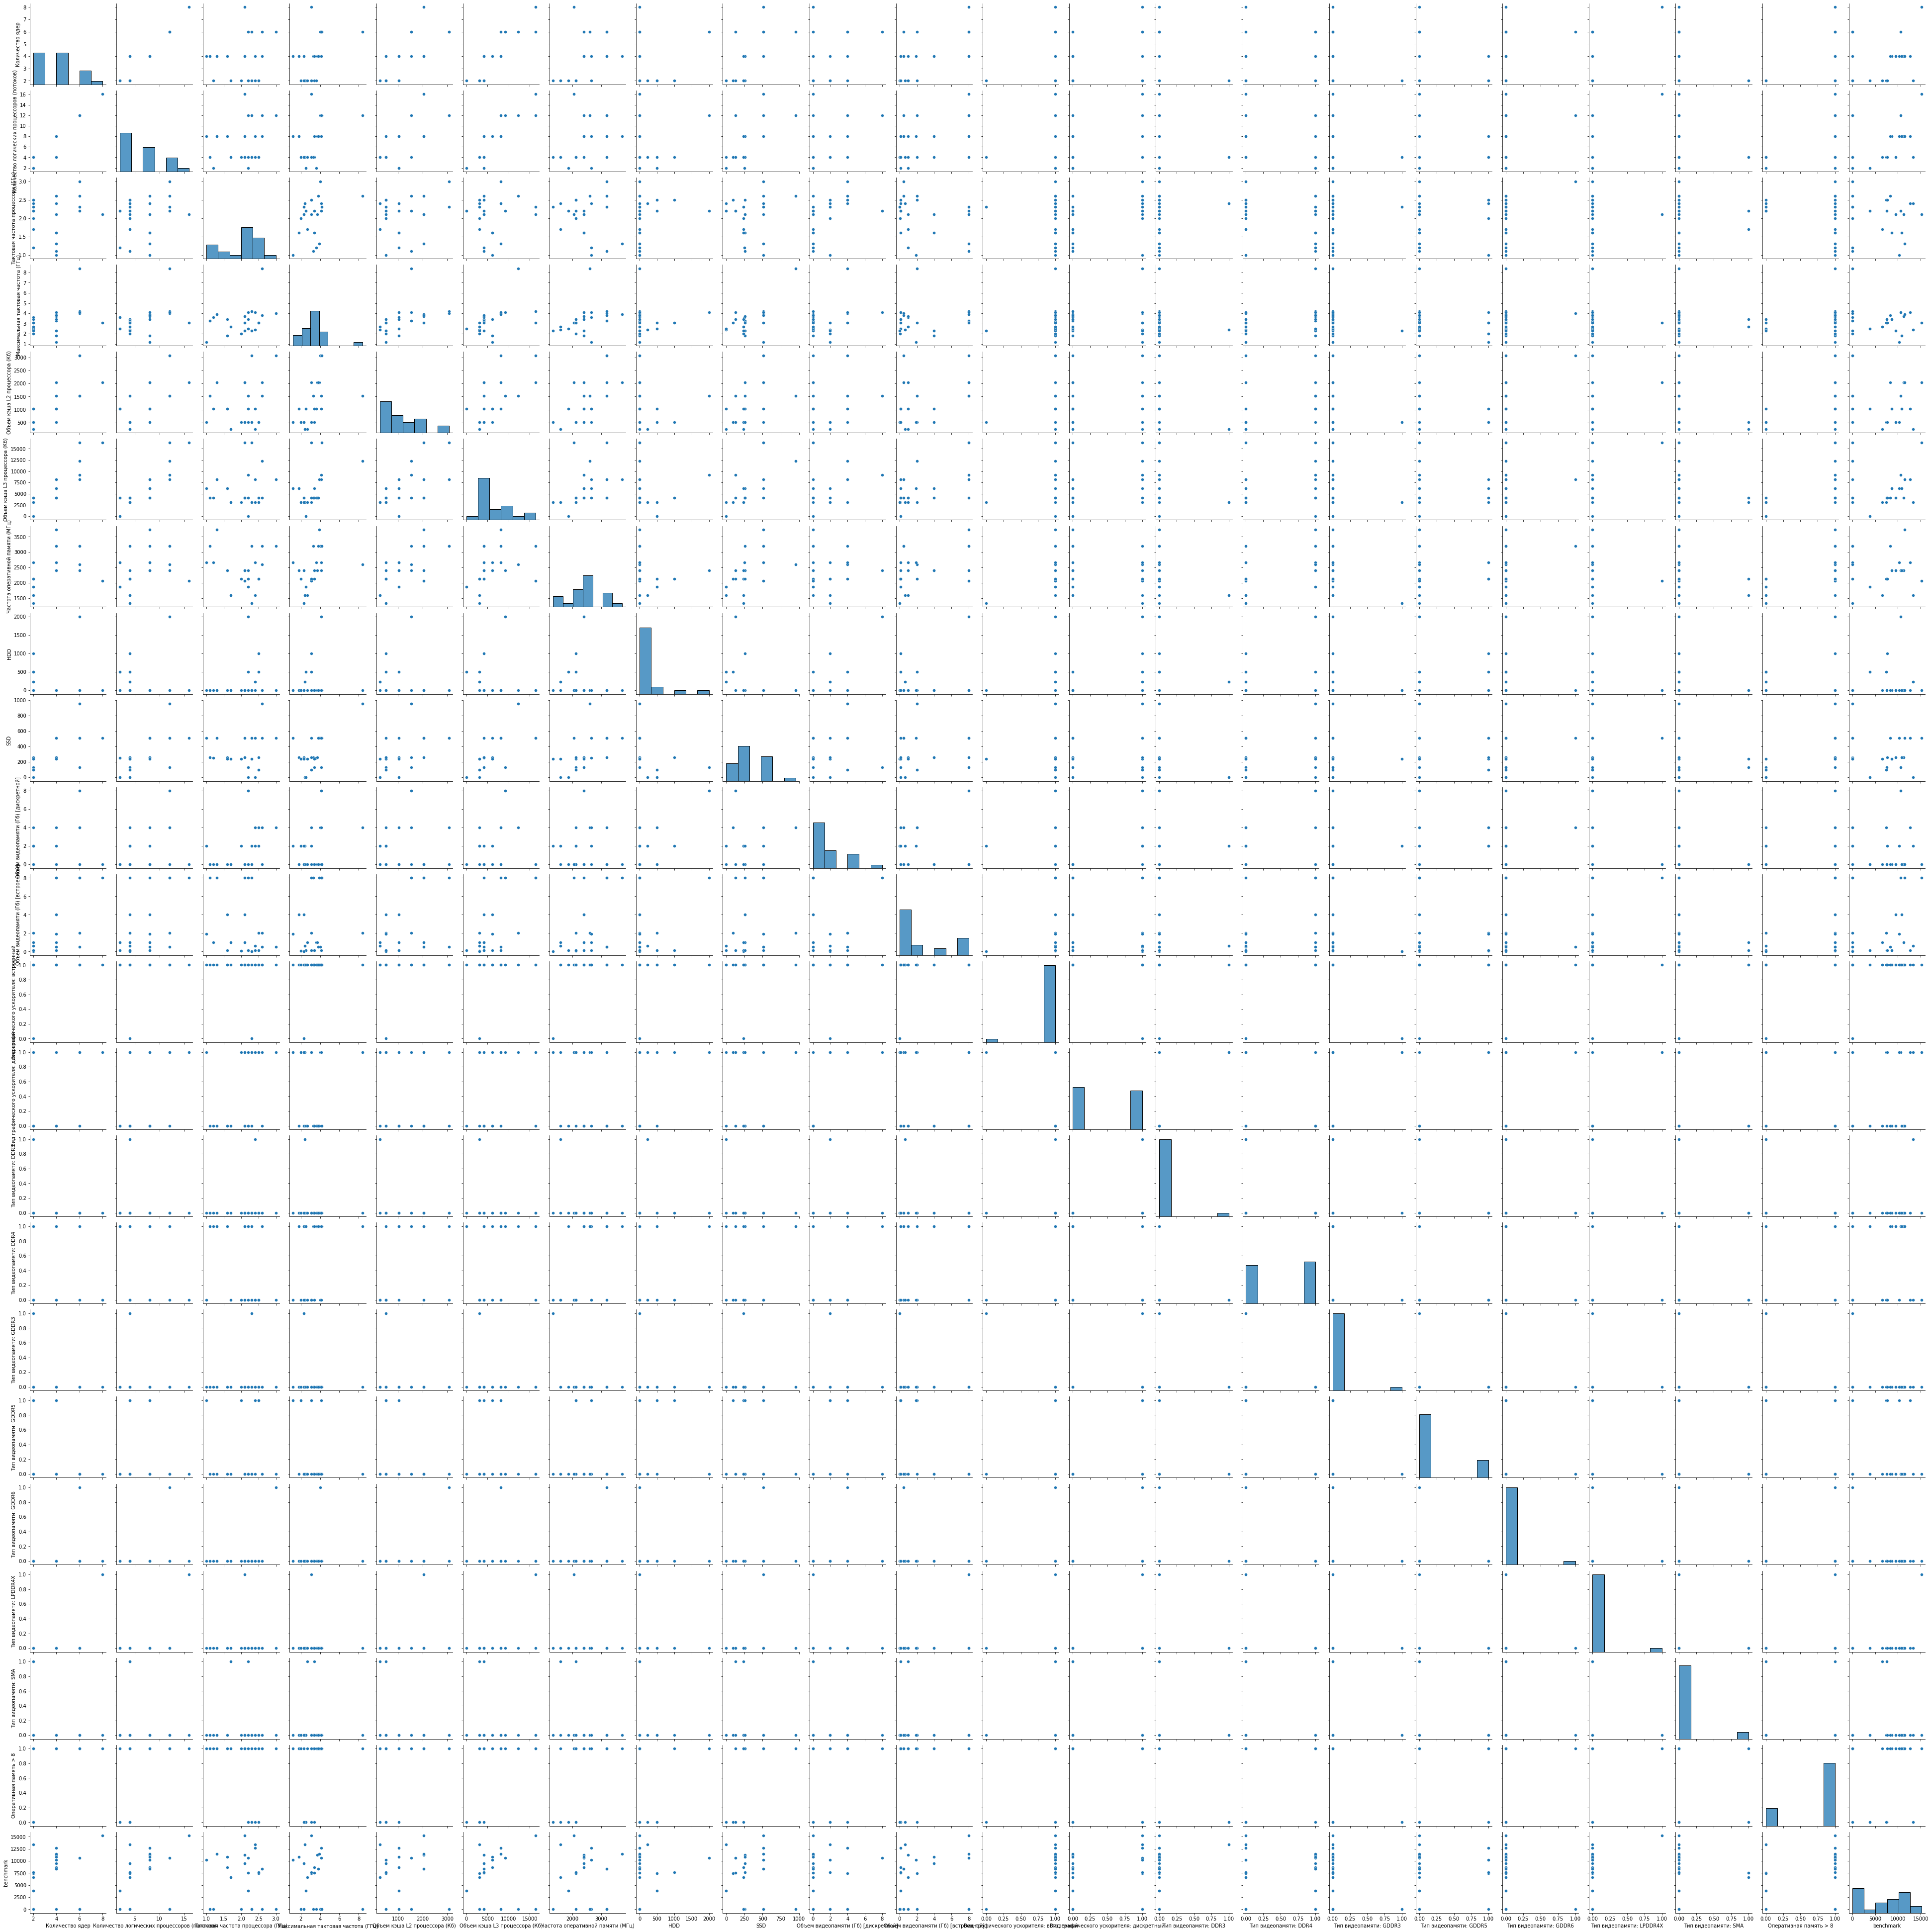

In [65]:
sns.pairplot(df, kind='scatter')
plt.xticks(rotation=90)
plt.show()

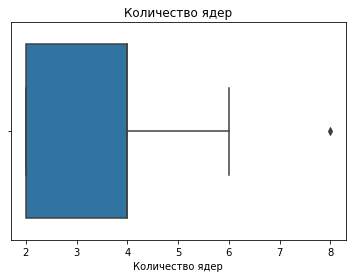

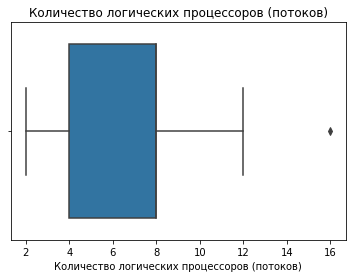

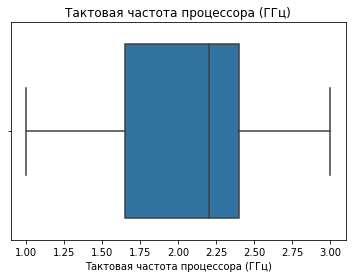

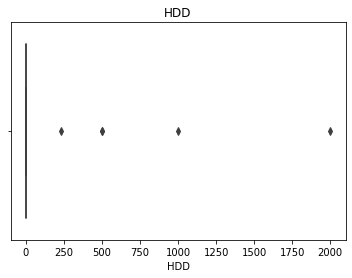

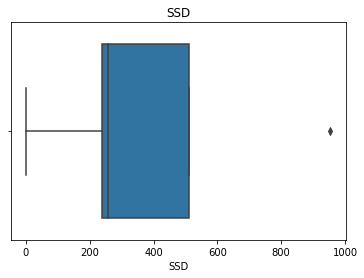

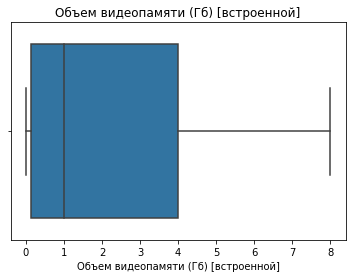

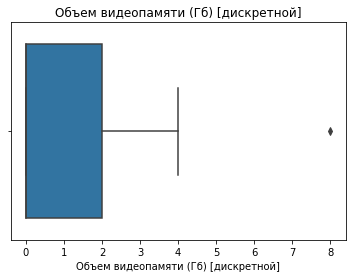

In [92]:
import warnings
warnings.filterwarnings('ignore')

for col in num_features:
    plt.title(col)
    sns.boxplot(df[col])
    plt.show()